In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#df_P7 = pd.read_parquet('Pegasus_P7_parquet/workflows/schema-1.0/part.0.parquet')

In [2]:
df_P7 = df_P7.loc[:, ~(df_P7.nunique() == 1) | ~((df_P7 == 0) | (df_P7 == 0.0)).all()]
df_P7 = df_P7.drop(columns=['critical_path_length', 'nfrs', 'scheduler', 'total_resources'], axis=1, errors='ignore')
df_P7['ts_submit_dt'] = pd.to_datetime(df_P7['ts_submit'], unit='s')
df_P7.to_csv('Pegasus_P7.csv')

In [25]:
df = pd.read_parquet('Galaxy/workflows/schema-1.0/part.0.parquet')
df = df.loc[:, ~(df.nunique() == 1) | ~((df == 0) | (df == 0.0)).all()]
df = df.drop(columns=['critical_path_length', 'nfrs', 'scheduler', 'total_resources', 'total_memory_usage'], axis=1, errors='ignore')
df['ts_submit_dt'] = pd.to_datetime(df['ts_submit'], unit='ms')
df

,approx_max_concurrent_tasks,critical_path_task_count,id,task_count,ts_submit,ts_submit_dt
0,3,10,24345,12,7892997578,1970-04-02 08:29:57.578
1,1,2,21436,2,1970115079,1970-01-23 19:15:15.079
2,2,1,21722,2,2433165188,1970-01-29 03:52:45.188
3,5,3,21796,7,2560814460,1970-01-30 15:20:14.460
4,1,1,21852,1,2705380047,1970-02-01 07:29:40.047
...,...,...,...,...,...,...
799,3,3,46266,5,40800240970,1971-04-18 05:24:00.970
800,3,2,46346,4,41020434273,1971-04-20 18:33:54.273
801,3,2,46394,4,41073281324,1971-04-21 09:14:41.324
802,3,2,46399,4,41076010844,1971-04-21 10:00:10.844


In [6]:
# Calculate the current min and max timestamps
min_ts = df['ts_submit_dt'].min()
max_ts = df['ts_submit_dt'].max()

# Calculate the new max timestamp to be one hour after the min timestamp
new_min_ts = min_ts
new_max_ts = min_ts + pd.Timedelta(hours=1)

# Calculate the scaling factor
total_seconds = (max_ts - min_ts).total_seconds()
new_total_seconds = (new_max_ts - new_min_ts).total_seconds()

# Scale all timestamps proportionally
df['ts_submit_dt2'] = df['ts_submit_dt'].apply(
    lambda x: new_min_ts + pd.Timedelta(seconds=((x - min_ts).total_seconds() * new_total_seconds / total_seconds))
)
df.to_csv('Galaxy.csv')

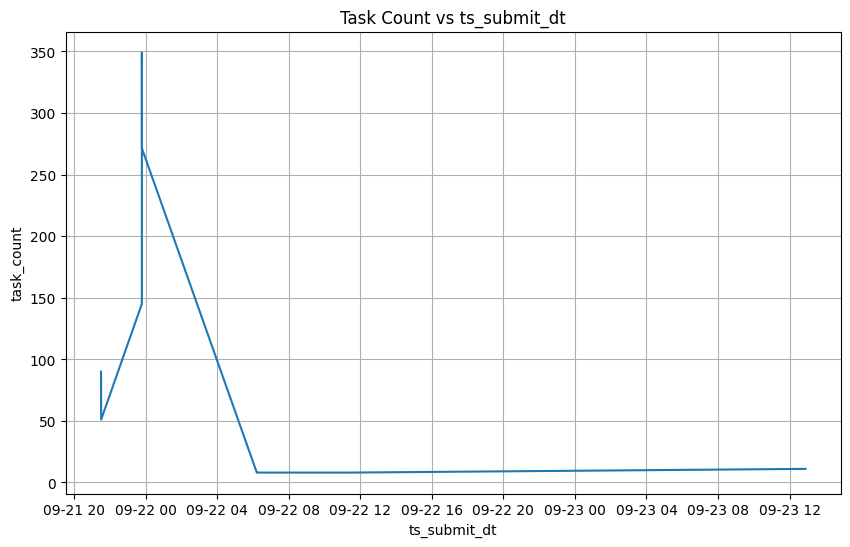

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df_P7['ts_submit_dt'].sort_values(), df_P7['task_count'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('task_count')
plt.title('Task Count vs ts_submit_dt')
plt.grid(True)
plt.show()

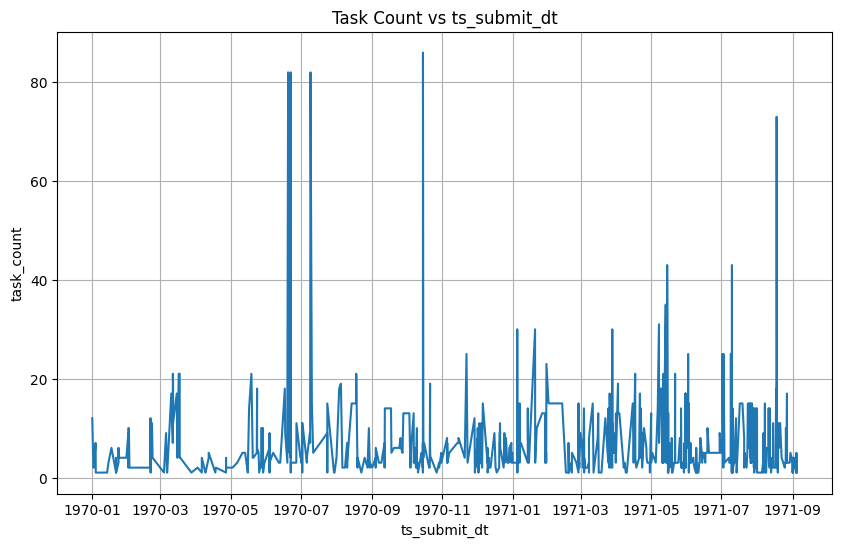

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['task_count'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('task_count')
plt.title('Task Count vs ts_submit_dt')
plt.grid(True)
plt.show()

In [8]:
df = pd.read_parquet('askalon_ee2_parquet/workflows/schema-1.0/part.0.parquet')
df = df.loc[:, ~(df.nunique() == 1) | ~((df == 0) | (df == 0.0)).all()]
df = df.drop(columns=['critical_path_length', 'nfrs', 'scheduler', 'total_resources', 'total_memory_usage'], axis=1, errors='ignore')
df['ts_submit_dt'] = pd.to_datetime(df['ts_submit'], unit='ms')
df

,approx_max_concurrent_tasks,critical_path_task_count,id,task_count,ts_submit,ts_submit_dt
0,3,4,7181430122660903956,7,1178809743377,2007-05-10 15:09:03.377
1,3,4,-6850215107502974893,7,1178810790377,2007-05-10 15:26:30.377
2,3,4,-6958963994053097031,7,1178813567377,2007-05-10 16:12:47.377
3,3,4,2968060732587960756,7,1178880793377,2007-05-11 10:53:13.377
4,3,4,-5769151902591249133,7,1178889522377,2007-05-11 13:18:42.377
...,...,...,...,...,...,...
1026,193,3,-5633824147796984109,389,1193844673377,2007-10-31 15:31:13.377
1027,1,1,-1155000491489496728,1,1194107591377,2007-11-03 16:33:11.377
1028,1,1,7922988336612587849,1,1194108022377,2007-11-03 16:40:22.377
1029,1,1,-972058208270042490,1,1194108282377,2007-11-03 16:44:42.377


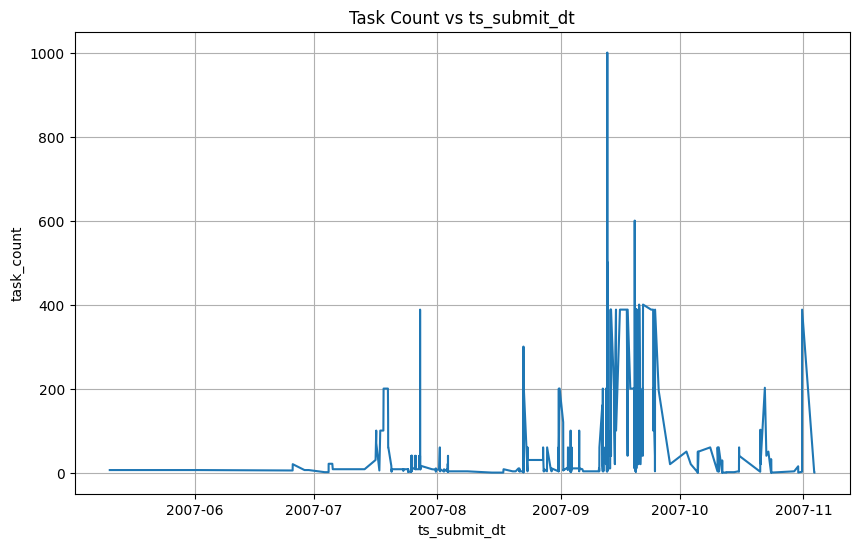

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['task_count'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('task_count')
plt.title('Task Count vs ts_submit_dt')
plt.grid(True)
plt.show()

In [7]:
df = pd.read_parquet('askalon_ee_parquet/workflows/schema-1.0/part.0.parquet')
df = df.loc[:, ~(df.nunique() == 1) | ~((df == 0) | (df == 0.0)).all()]
df = df.drop(columns=['critical_path_length', 'nfrs', 'scheduler', 'total_resources', 'total_memory_usage'], axis=1, errors='ignore')
df['ts_submit_dt'] = pd.to_datetime(df['ts_submit'], unit='ms')
df.to_csv('askalon_ee.csv')

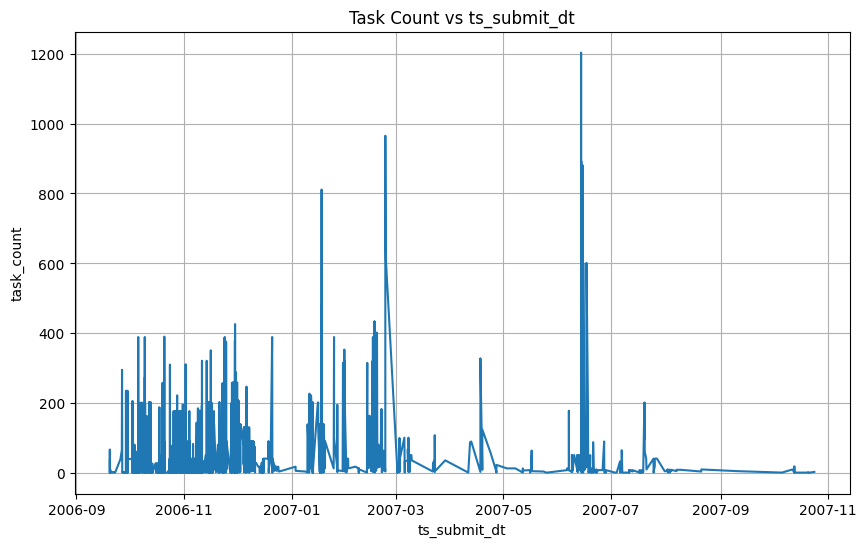

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['task_count'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('task_count')
plt.title('Task Count vs ts_submit_dt')
plt.grid(True)
plt.show()

In [7]:
df = pd.read_parquet('LANL_Mustang_parquet/workflows/schema-1.0/part.0.parquet')
df = df.loc[:, ~(df.nunique() == 1) | ~((df == -1) | (df == -1.0)).all()]
df = df.drop(columns=['critical_path_length', 'nfrs', 'scheduler', 'total_resources', 'total_memory_usage'], axis=1, errors='ignore')
df['ts_submit_dt'] = pd.to_datetime(df['ts_submit'], unit='ms')
df['ts_submit_dt'] = df['ts_submit_dt'].sort_values()
df['total_queries_count'] = df['task_count']
df.drop(columns=['task_count'], inplace=True)
df.drop(columns=['id'], inplace=True)
df.set_index('ts_submit_dt', inplace=True)
df.to_csv('LANL_Mustang.csv')

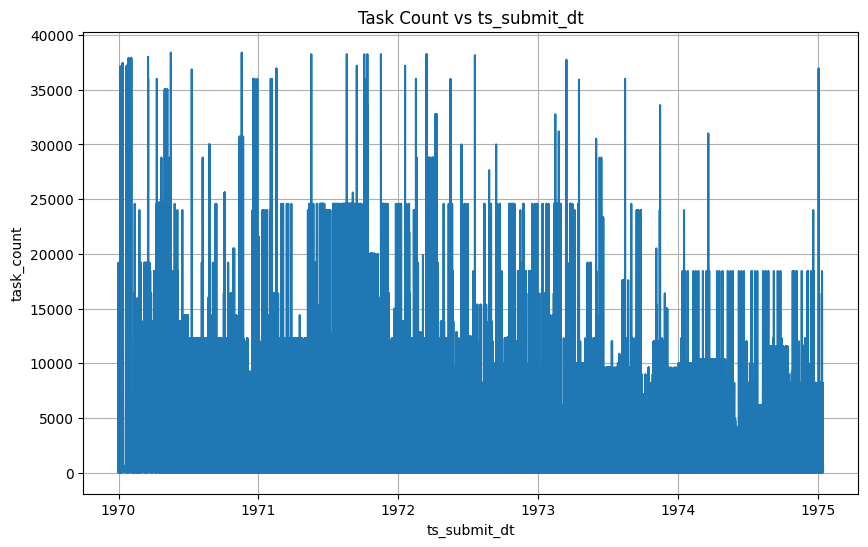

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['task_count'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('task_count')
plt.title('Task Count vs ts_submit_dt')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/galaxy_trace_smoothed.csv')
to_save = df.head()
to_save.to_csv('galaxy_trace_smoothed_head.csv')

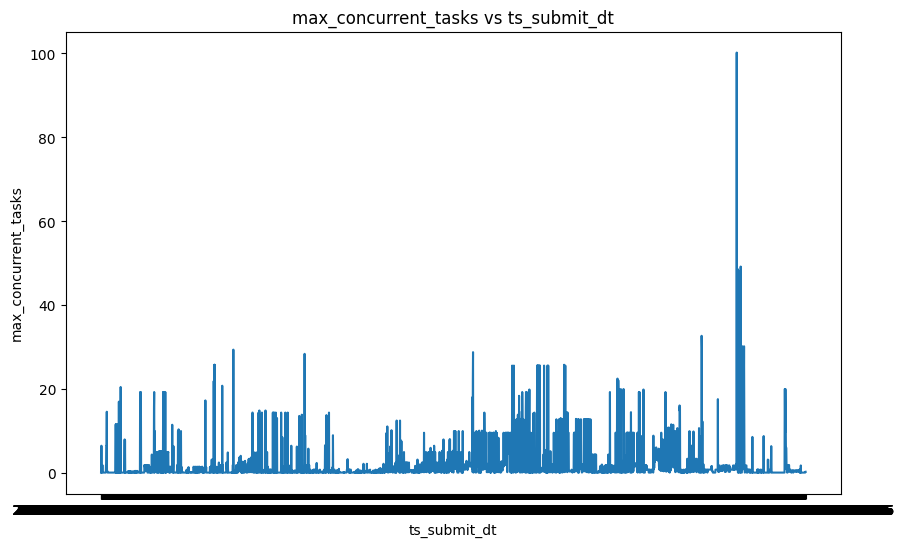

In [ ]:
df = pd.read_csv('./datasets/askalon_ee_trace.csv')
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['max_concurrent_tasks']/10, marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('max_concurrent_tasks')
plt.title('max_concurrent_tasks vs ts_submit_dt')
plt.show()

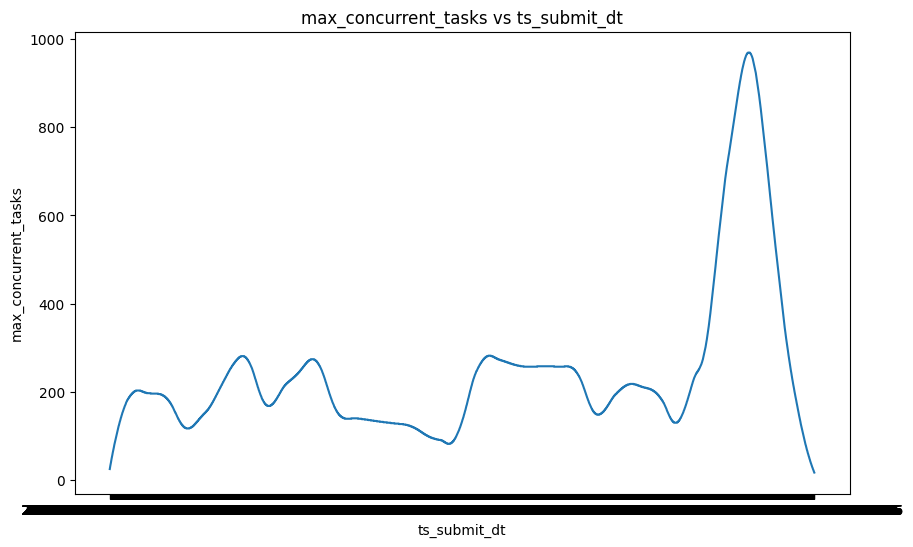

In [3]:
df = pd.read_csv('./askalon_ee_trace_concurrent_tasks_smoothed.csv')
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['max_concurrent_tasks'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('max_concurrent_tasks')
plt.title('max_concurrent_tasks vs ts_submit_dt')
plt.show()

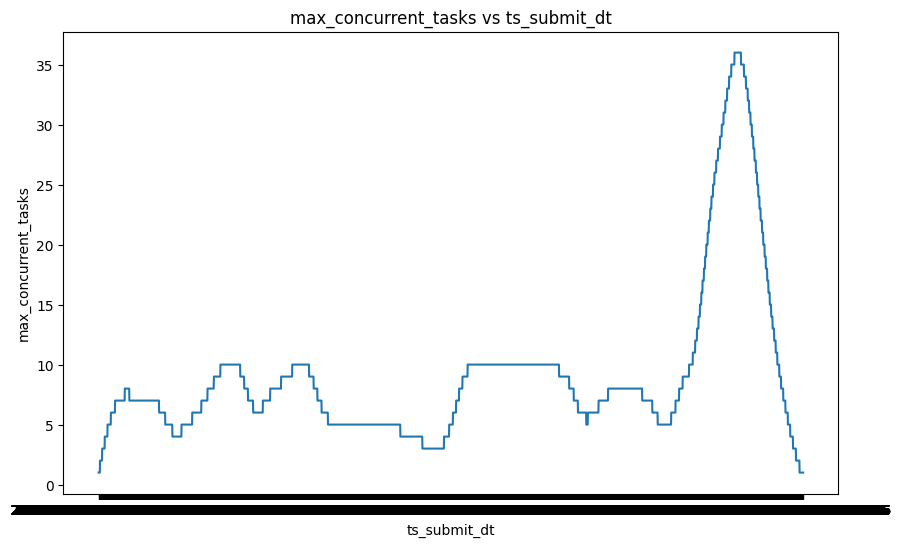

In [6]:
df = pd.read_csv('./datasets/askalon_ee_trace_processed.csv')
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['max_concurrent_tasks'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('max_concurrent_tasks')
plt.title('max_concurrent_tasks vs ts_submit_dt')
plt.show()

In [7]:
df.head()

,ts_submit_dt2,max_concurrent_tasks,aggregation_queries_count,total_queries_count,ts_submit,ts_submit_dt,max_concurrent_tasks_original,standard_queries_count,first_name_queries_count,last_name_queries_count,country_queries_count,other_queries_count
0,2006-09-19 22:37:54.716000000,1,36,145,1158705474716,2006-09-19 22:37:54.716,1,109,49,26,23,11
1,2006-09-19 22:37:55.120564466,1,37,148,1158706766716,2006-09-19 22:59:26.716,1,111,29,27,27,28
2,2006-09-19 22:37:55.483169461,1,5,152,1158707924716,2006-09-19 23:18:44.716,65,147,49,35,35,28
3,2006-09-19 22:37:56.324237695,1,39,155,1158710610716,2006-09-20 00:03:30.716,1,116,41,29,25,21
4,2006-09-19 22:37:56.661792258,1,40,159,1158711688716,2006-09-20 00:21:28.716,1,119,33,29,29,28


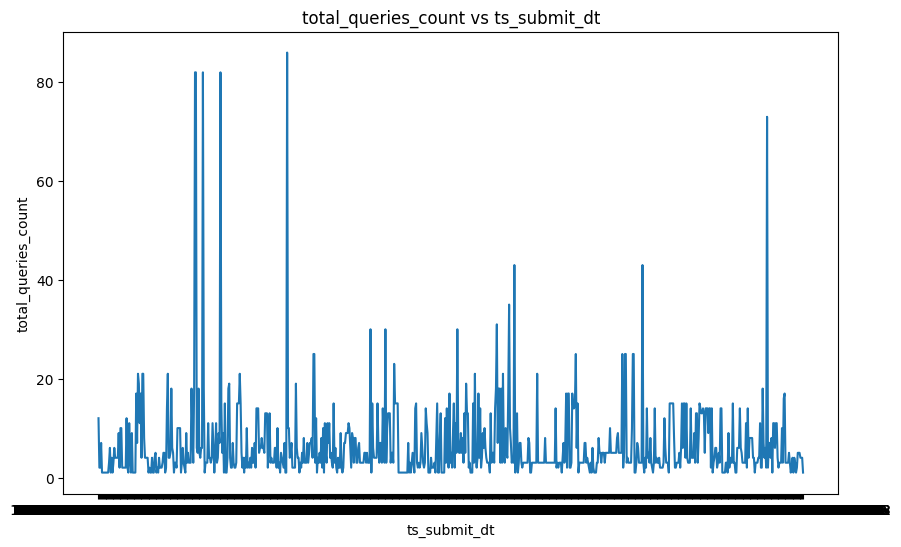

In [11]:
df = pd.read_csv('./datasets/galaxy_trace.csv')
plt.figure(figsize=(10, 6))
plt.plot(df['ts_submit_dt'].sort_values(), df['total_queries_count'], marker='', linestyle='-')
plt.xlabel('ts_submit_dt')
plt.ylabel('total_queries_count')
plt.title('total_queries_count vs ts_submit_dt')
plt.show()